In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 


# Linear Regression

Linear Regression answers the question: how do we find a line that fits the given data? 

Let's first generate a realistic dataset, you can think of this as hours studied (x axis) and grade 0-30 (y axis)

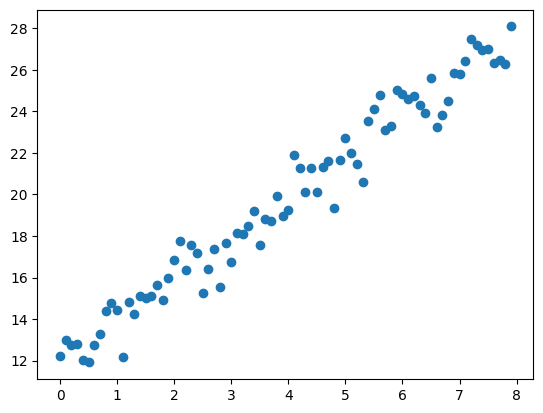

In [2]:
x = torch.arange(0, 8, 0.1)  # [0, 0.1, 0.2, ..., 9.9]

y = 2*x + 12  # y = (mx + q)

y += torch.randn(x.shape[0]) # add noise  

plt.scatter(x, y)

Given this chart, we will try to fit the line y = mx + q by finding the "parameters" m and q to best fit the data <br> 

Now two questions arise <br>
- What does it mean to "fit" the data?
- How do we tune the best parameters? 



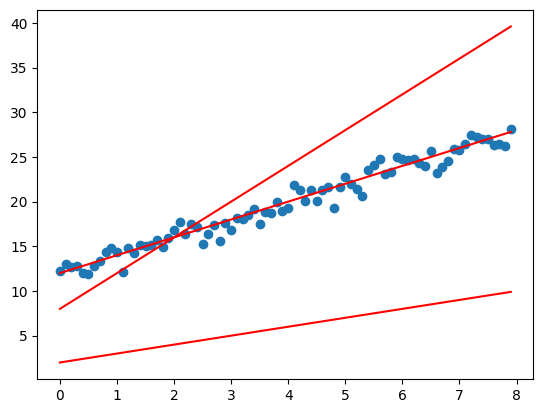

In [3]:
pred1 = 1 * x + 2  
pred2 = 2 * x + 12
pred3 = 4 * x + 8

plt.scatter(x, y)
plt.plot(x, pred1.detach().numpy(), color='red')
plt.plot(x, pred2.detach().numpy(), color='red')
plt.plot(x, pred3.detach().numpy(), color='red')

It would be helpful to have some single value that accurately describes how well the model is doing, we will call this value "loss", which is defined as the "mean squared error" over the given sample like this: 

loss = ((prediction - ideal)**2).mean()

Now that we have a function going from dataset and parameters to loss, we can use a calculus tool to optimize it, the partial derivatives can be found with specific formulas and they tell us exactly how a small change to each parameter will affect the output value. We want to minimize the loss, so we will subtract a scaled version of the derivatives to each parameter. 

In [4]:
m = 0
q = 0
lr = 0.01

In [5]:
for i in range(1000):
    predictions = m * x + q
    loss = ((predictions - y)**2).mean()
    
    dm = (2 * (predictions - y) * x).mean()
    dq = (2 * (predictions - y)).mean()
    # double checked, the gradient is correct

    m -= lr * dm
    q -= lr * dq

    if i % 200 == 0:
        print("Loss: ", loss.item(), "\n - m: ", m.item(), "\n - q: ", q.item(), "\n")


Loss:  412.64849853515625 
 - m:  1.772961139678955 
 - q:  0.39549580216407776 

Loss:  5.220034599304199 
 - m:  2.768911361694336 
 - q:  7.816661834716797 

Loss:  1.4003623723983765 
 - m:  2.2719202041625977 
 - q:  10.419781684875488 

Loss:  0.8686075210571289 
 - m:  2.0864851474761963 
 - q:  11.391043663024902 

Loss:  0.7945790886878967 
 - m:  2.017296552658081 
 - q:  11.753437995910645 



## Logistic Regression
Logistic regression answers the following question: <br> How do we find a function that classifies a binary dataset?

C:\Users\lucam\AppData\Local\Temp\ipykernel_37904\3909566606.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x + torch.randn(100) > 3.5).float()


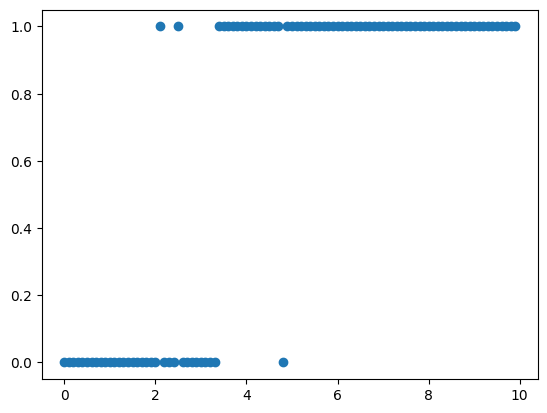

In [6]:
x = torch.arange(0, 10, 0.1)
y = torch.tensor(x + torch.randn(100) > 3.5).float()
plt.scatter(x, y)

Actually, because some datapoints are scattered on top and bottom, we have to accept some level of uncertainty in the results, just as we did with Linear Regression. <br> 


So the results won't be binary but a probability of the output being one. <br>
We need a function that can scale any value to [0, 1]. We can start with sigmoid.


Interestingly, we choose activation functions such that their derivative is trivial to calculate, the derivative of sigmoid is (1-simoid(x))

In [7]:
# we add sigmoid, an activation function that squashes the output between 0 and 1
def sigmoid(x): return 1 / (1 + torch.exp(-x))

m = torch.zeros(1, requires_grad=True)
q = torch.zeros(1, requires_grad=True)
lr = 0.1

In [8]:
iterations = 1000

for i in range(iterations):
    predictions = sigmoid(m * x + q) 
    loss = ((predictions - y)**2).mean()
    loss.backward()
    
    with torch.no_grad():
        m -= lr * m.grad
        q -= lr * q.grad
        m.grad = None
        q.grad = None

    if i % 200 == 0:
        print("Loss: ", loss.item(), "\n - m: ", m.item(), "\n - q: ", q.item(), "\n")


Loss:  0.25 
 - m:  0.09560000151395798 
 - q:  0.008499999530613422 

Loss:  0.09789919853210449 
 - m:  0.44455140829086304 
 - q:  -0.9323650598526001 

Loss:  0.0782848671078682 
 - m:  0.5864110589027405 
 - q:  -1.5365686416625977 

Loss:  0.06901594251394272 
 - m:  0.692173957824707 
 - q:  -1.951542615890503 

Loss:  0.06373000144958496 
 - m:  0.7754186391830444 
 - q:  -2.2647159099578857 



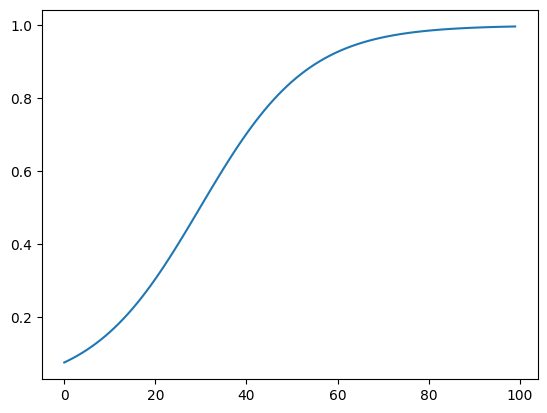

In [9]:
plt.plot(predictions.detach().numpy())

As you can see we got a curve that approximates the original chart pretty well. <br>
In the future we will use different loss functions, such as tanh, relu and gelu

Sigmoid: squashes the output between 0 and 1


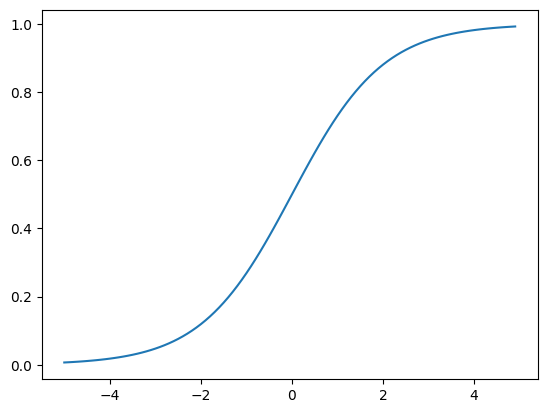

Tanh: squashes the output between -1 and 1


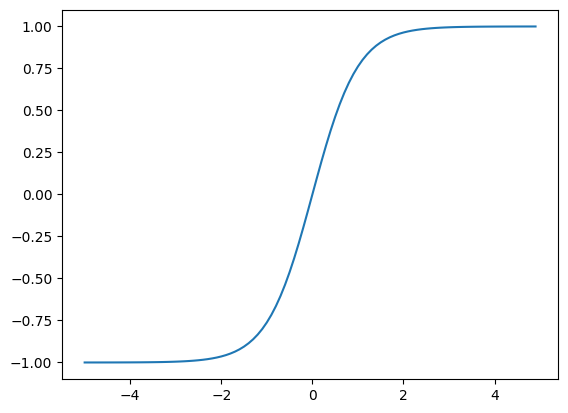

Relu: keeps the positive values and sets the negative values to 0


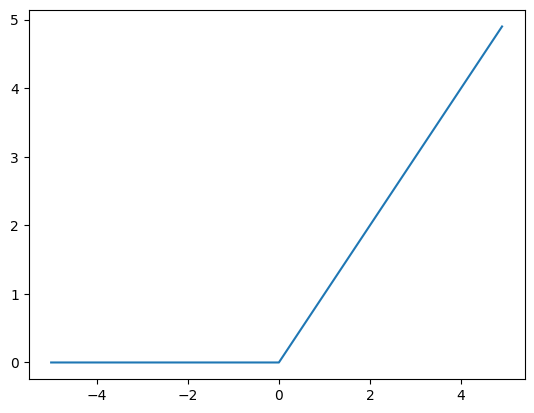

Gelu: keeps the positive values and applies a smooth function over the negative values


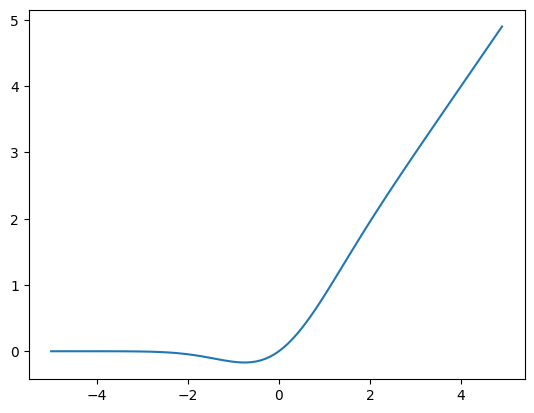

In [10]:
from torch.nn.functional import sigmoid, relu, tanh, gelu

x = torch.arange(-5, 5, 0.1)

print("Sigmoid: squashes the output between 0 and 1")
plt.plot(x, sigmoid(x))
plt.show()

print("Tanh: squashes the output between -1 and 1")
plt.plot(x, tanh(x))
plt.show()

print("Relu: keeps the positive values and sets the negative values to 0")
plt.plot(x, relu(x))
plt.show()

print("Gelu: keeps the positive values and applies a smooth function over the negative values") 
plt.plot(x, gelu(x))
plt.show()
